In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit
from sklearn.ensemble import AdaBoostClassifier , RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.linear_model import LogisticRegression, PoissonRegressor
from joblib import dump, load
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
cardio = pd.read_csv('cardio_train.csv')

In [3]:
cardio.drop('id',inplace=True,axis=1)

In [4]:
train_data, test_data = train_test_split(cardio, test_size=0.2, random_state=43)

In [5]:
train_data.shape

(56000, 12)

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'height'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'ap_hi'}>,
        <AxesSubplot:title={'center':'ap_lo'}>],
       [<AxesSubplot:title={'center':'cholesterol'}>,
        <AxesSubplot:title={'center':'gluc'}>,
        <AxesSubplot:title={'center':'smoke'}>],
       [<AxesSubplot:title={'center':'alco'}>,
        <AxesSubplot:title={'center':'active'}>,
        <AxesSubplot:title={'center':'cardio'}>]], dtype=object)

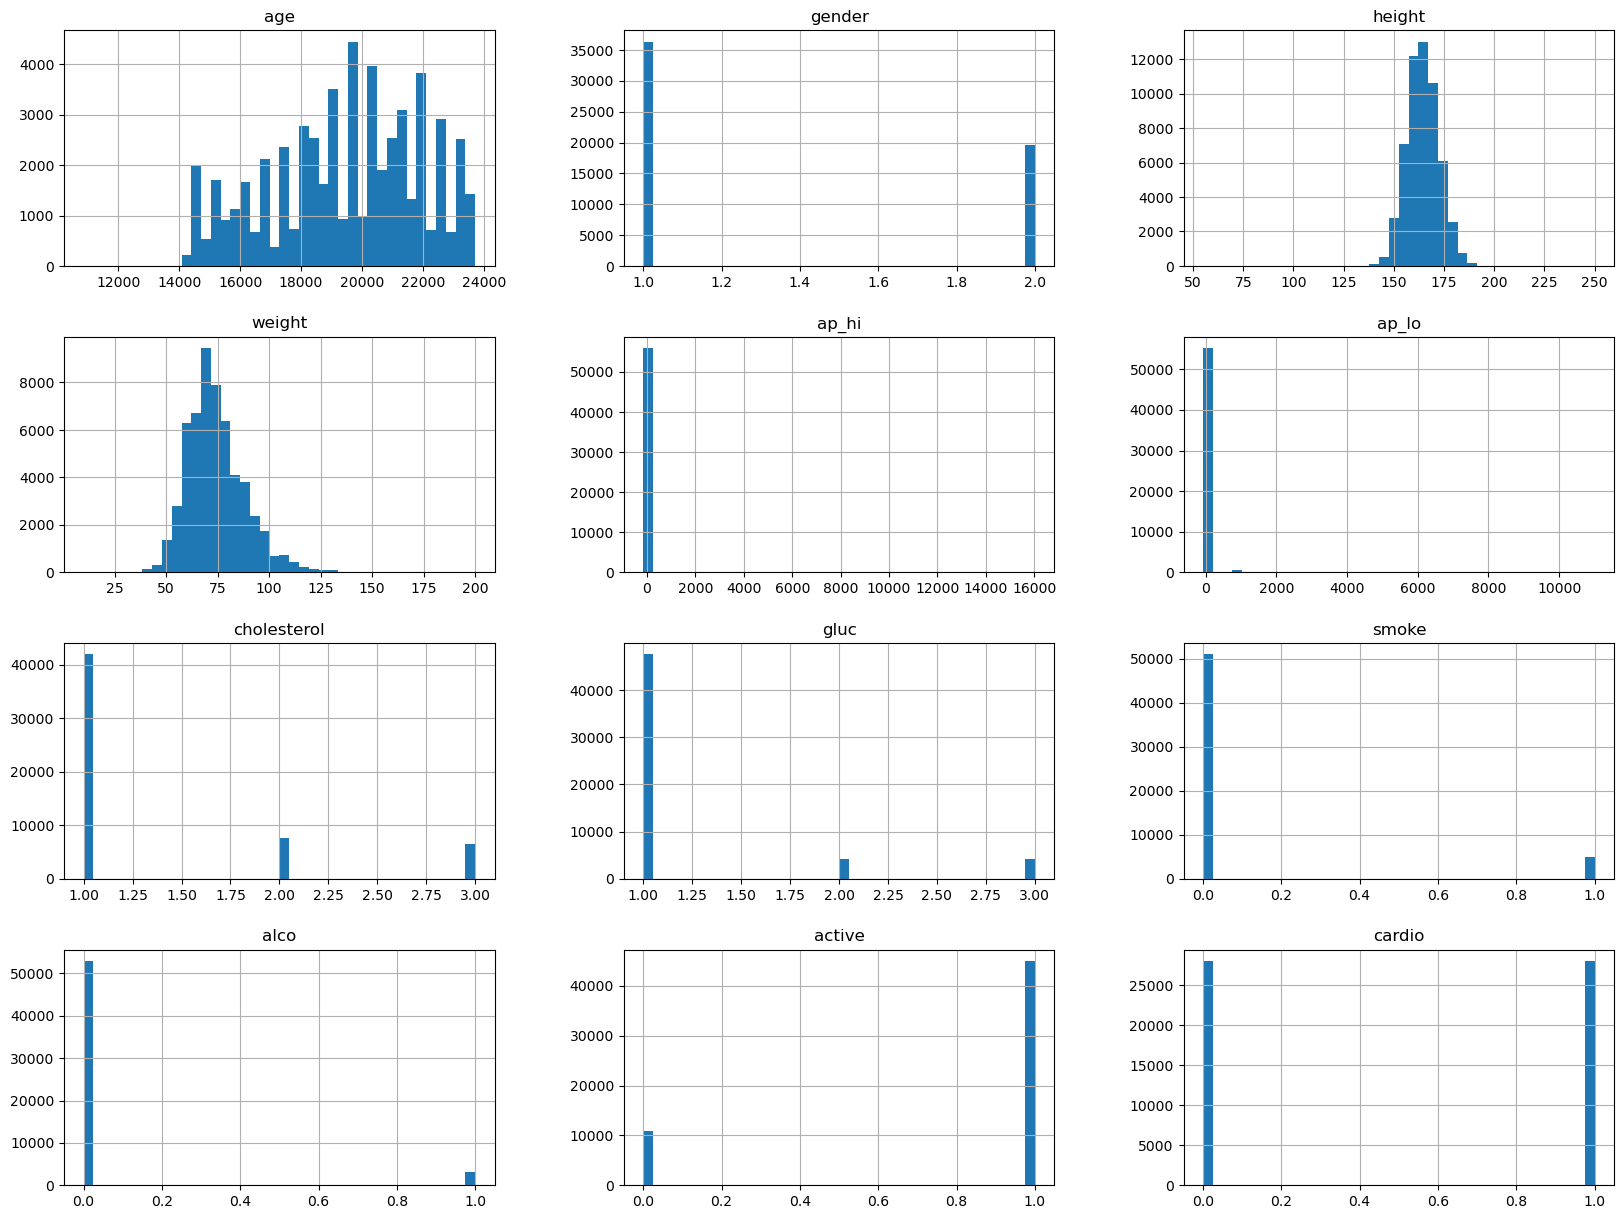

In [6]:
train_data.hist(bins=40, figsize=(20,15))

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 48781 to 14148
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          56000 non-null  int64  
 1   gender       56000 non-null  int64  
 2   height       56000 non-null  int64  
 3   weight       56000 non-null  float64
 4   ap_hi        56000 non-null  int64  
 5   ap_lo        56000 non-null  int64  
 6   cholesterol  56000 non-null  int64  
 7   gluc         56000 non-null  int64  
 8   smoke        56000 non-null  int64  
 9   alco         56000 non-null  int64  
 10  active       56000 non-null  int64  
 11  cardio       56000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 5.6 MB


In [8]:
train_data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000
mean,19469.472107,1.350179,164.357821,74.235109,128.591571,97.121964,1.365821,1.226339,0.088714,0.053946,0.804286,0.499607
std,2465.323913,0.477030,8.221461,14.386948,144.080757,201.982917,0.679656,0.571878,0.284333,0.225914,0.396753,0.500004
min,10859.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17668.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21324.250000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=43)

In [10]:
features = train_data.iloc[:,:11]
labels = train_data.iloc[:,11]

## Creating Correalation

In [11]:
Correlation = cardio.corr()

In [12]:
Correlation['cardio'].sort_values(ascending=False)

cardio         1.000000
age            0.238159
cholesterol    0.221147
weight         0.181660
gluc           0.089307
ap_lo          0.065719
ap_hi          0.054475
gender         0.008109
alco          -0.007330
height        -0.010821
smoke         -0.015486
active        -0.035653
Name: cardio, dtype: float64

In [13]:
attributes = ['age','cholesterol','weight','active','smoke']

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='cholesterol', ylabel='age'>,
        <AxesSubplot:xlabel='weight', ylabel='age'>,
        <AxesSubplot:xlabel='active', ylabel='age'>,
        <AxesSubplot:xlabel='smoke', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='cholesterol'>,
        <AxesSubplot:xlabel='cholesterol', ylabel='cholesterol'>,
        <AxesSubplot:xlabel='weight', ylabel='cholesterol'>,
        <AxesSubplot:xlabel='active', ylabel='cholesterol'>,
        <AxesSubplot:xlabel='smoke', ylabel='cholesterol'>],
       [<AxesSubplot:xlabel='age', ylabel='weight'>,
        <AxesSubplot:xlabel='cholesterol', ylabel='weight'>,
        <AxesSubplot:xlabel='weight', ylabel='weight'>,
        <AxesSubplot:xlabel='active', ylabel='weight'>,
        <AxesSubplot:xlabel='smoke', ylabel='weight'>],
       [<AxesSubplot:xlabel='age', ylabel='active'>,
        <AxesSubplot:xlabel='cholesterol', ylabel='active'>,
        <AxesSubplot:xlabel='w

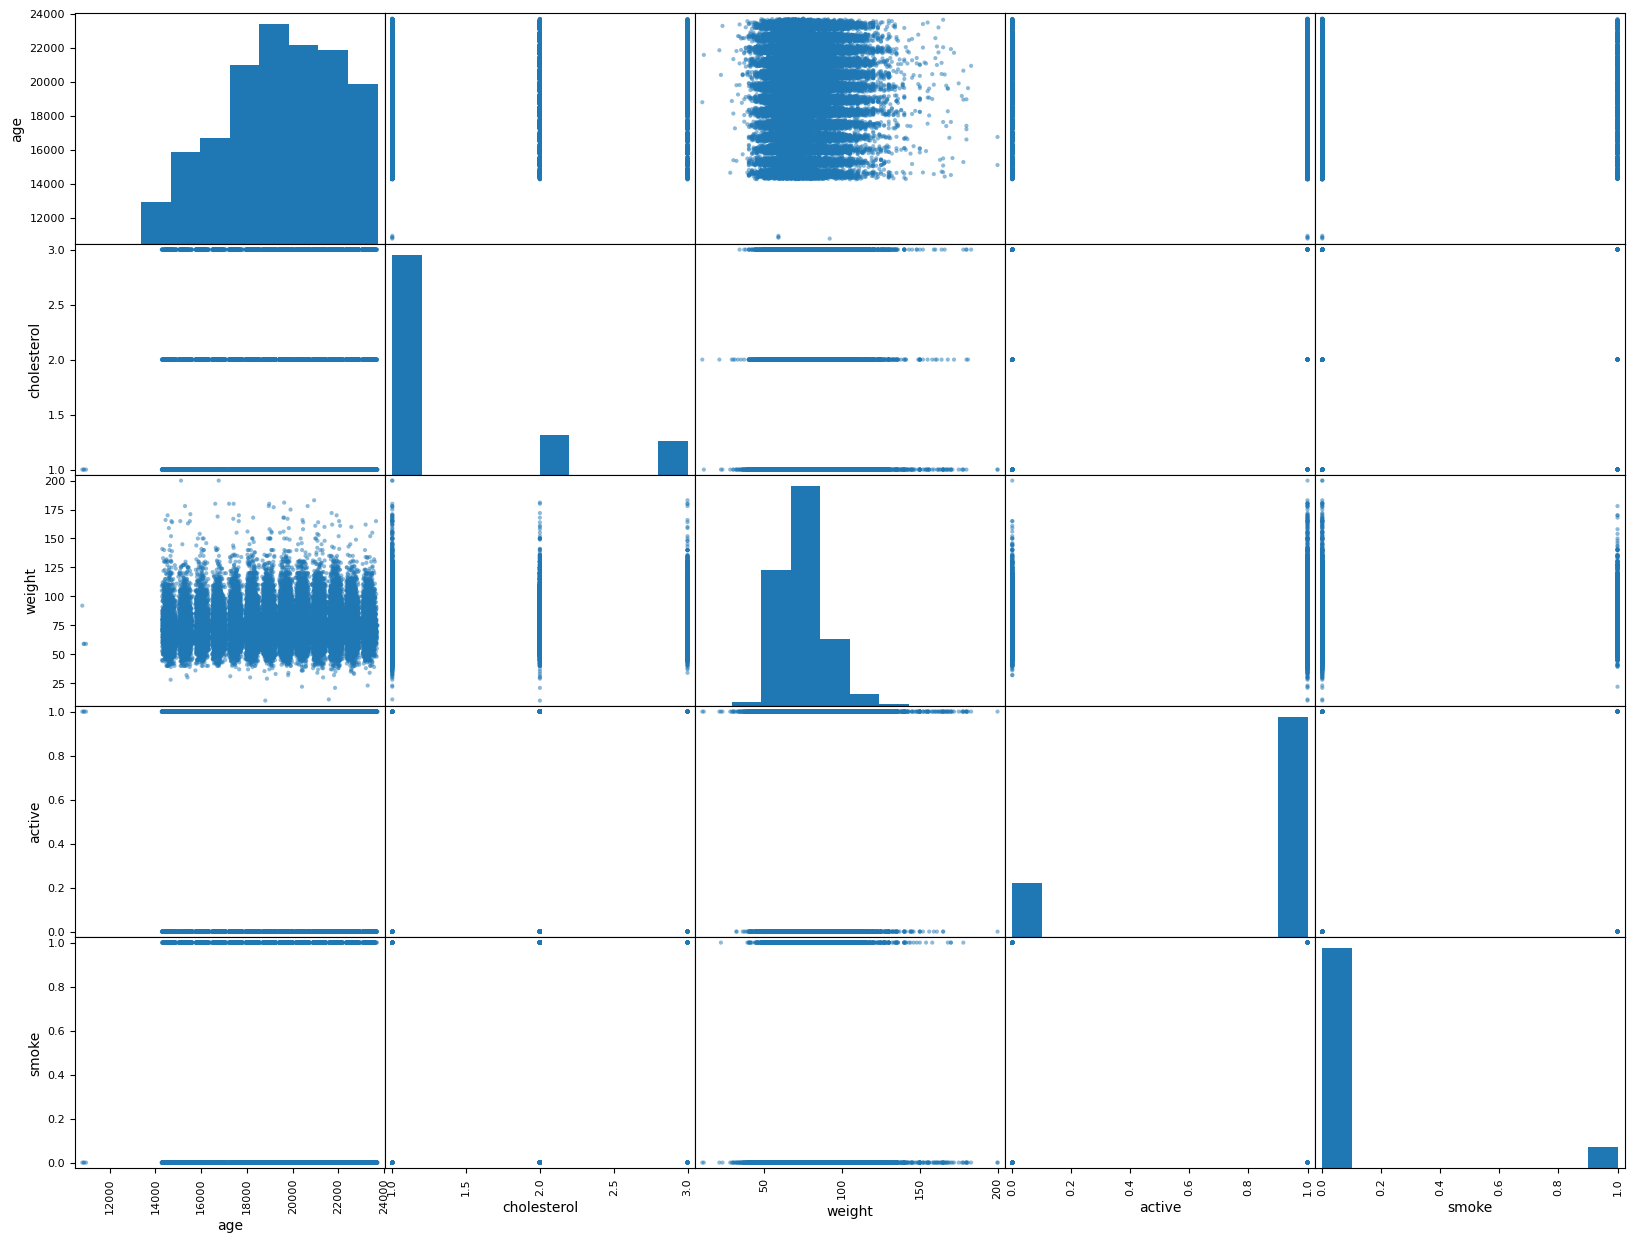

In [14]:
scatter_matrix(cardio[attributes], figsize=(20,15))

<AxesSubplot:xlabel='weight', ylabel='age'>

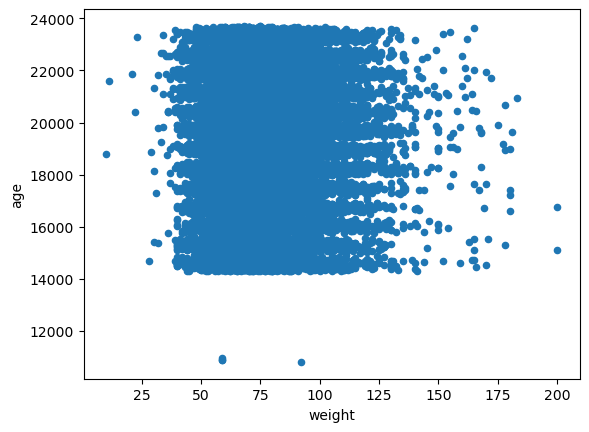

In [15]:
cardio.plot(kind='scatter',x='weight',y='age')

# Trying to correalate by combining

In [16]:
new = cardio['year'] = cardio['age']/365

In [17]:
new

0        50.391781
1        55.419178
2        51.663014
3        48.282192
4        47.873973
           ...    
69995    52.712329
69996    61.920548
69997    52.235616
69998    61.454795
69999    56.273973
Name: age, Length: 70000, dtype: float64

In [18]:
cardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.920548
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795


# Handeling missing values

In [19]:
impute = SimpleImputer(strategy='median')
impute.fit(cardio)

SimpleImputer(strategy='median')

In [20]:
cardio

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50.391781
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55.419178
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51.663014
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48.282192
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47.873973
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0,52.712329
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1,61.920548
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1,52.235616
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61.454795


# Sklearn Design

In [21]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('Scaller', StandardScaler())
])

In [22]:
cardio_new = my_pipeline.fit_transform(features)

In [23]:
cardio_new

array([[-0.2748029 , -0.7340874 , -0.53005912, ..., -0.31201071,
        -0.23879404, -2.02718747],
       [ 0.12393123,  1.36223562,  0.68628057, ..., -0.31201071,
        -0.23879404,  0.49329429],
       [-1.7894247 , -0.7340874 , -0.77332705, ..., -0.31201071,
        -0.23879404, -2.02718747],
       ...,
       [ 1.24914839,  1.36223562,  0.5646466 , ...,  3.20501821,
         4.1877092 , -2.02718747],
       [-0.56401697,  1.36223562,  0.44301263, ..., -0.31201071,
         4.1877092 ,  0.49329429],
       [-1.951271  , -0.7340874 , -0.04352324, ..., -0.31201071,
        -0.23879404,  0.49329429]])

# Selecting model

In [24]:
Model1 = linear_model.LinearRegression()

In [25]:
Model1.fit(cardio_new, labels)

LinearRegression()

In [26]:
some_data = features.iloc[4:]

In [27]:
some_label = labels.iloc[4:]

In [28]:
new_data = my_pipeline.transform(some_data)

In [29]:
dump(my_pipeline, 'first_cardio_pipelie.joblib')

['first_cardio_pipelie.joblib']

# After Model done testing process

In [30]:
test_data

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10315,16853,2,171,78.0,139,80,1,1,1,0,1,1
60149,18321,1,159,57.0,120,80,1,1,0,0,1,0
17187,17562,1,162,65.0,110,70,1,1,0,0,0,0
32211,22804,1,162,70.0,130,90,1,1,0,0,0,1
41222,21191,1,151,64.0,120,80,2,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
42307,23107,1,167,71.0,120,60,1,1,0,0,1,1
59331,20967,2,175,75.0,120,80,1,1,0,0,1,1
25227,21842,2,162,58.0,110,70,2,1,0,0,1,0
59868,21833,2,174,79.0,160,100,1,2,0,0,1,1


In [31]:
features1 = test_data.iloc[:,0:11]

In [32]:
labels1 = test_data.iloc[:,11]

In [33]:
here_copy = load('first_cardio_pipelie.joblib')

In [34]:
new_feature = here_copy.transform(features1)

In [35]:
pre_feature = Model1.predict(new_feature)

In [36]:
mse = mean_squared_error(labels1, pre_feature)

In [37]:
final_mse = np.sqrt((mse))

In [38]:
final_mse

0.4724397303499311

In [39]:
Model2 = LogisticRegression()
Model4 = KNeighborsClassifier()

In [40]:
Model2.fit(cardio_new, labels)
Model4.fit(cardio_new, labels)

KNeighborsClassifier()

In [41]:
f1 = Model2.predict(new_feature)
f3 = Model4.predict(new_feature)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [42]:
g1 = np.sqrt(mean_squared_error(labels1, f1))
g2 = np.sqrt(mean_squared_error(labels1, f3))

In [43]:
print(g1,'\n',g2)

0.5347228921867582 
 0.5952790462103826
